<a href="https://colab.research.google.com/github/anubhavgupta1/Udacity/blob/main/Sigmoid%20Neuron/Toy%20Data/ToyData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Toy Data

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

In [ ]:
from mpl_toolkits import mplot3d

In [ ]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

## Class for Sigmoid Neuron

In [ ]:
def plot_sn(X,Y,sn,ax):
  X1 = np.linspace(-10,10,100)
  X2 = np.linspace(-10,10,100)
  XX1, XX2 = np.meshgrid(X1,X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i,j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1,XX2,YY,cmap=my_cmap,alpha=0.6)
  ax.scatter(X[:,0],X[:,1],c=Y,cmap=my_cmap)
  ax.plot()




In [ ]:
X = np.asarray([[2.5,2.5],[4,-1],[1,-4],[-3,1.25],[-2,-4],[1,5]])
Y = [1,1,1,0,0,0]

In [ ]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)       
      self.w -= learning_rate * dw
      self.b -= learning_rate * db
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss[i] = mean_squared_error(Y_pred, Y)
    
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

In [ ]:
epochs = 1
learning_rate = 0.25
sn = SigmoidNeuron()
sn.fit(X,Y,epochs,learning_rate,True)
print(sn.w,",",sn.b)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



[[-1.26616621 -1.07093552]] , [-0.00975325]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



[[-1.66753858 -0.24009213]] , [0.02825141]



[[-1.61144537 -0.3768733 ]] , [0.06177307]



[[-1.56012112 -0.49725296]] , [0.09093541]



[[-1.51701831 -0.58110922]] , [0.10996701]



[[-1.47841086 -0.63868709]] , [0.12141448]



[[-1.44085129 -0.68131472]] , [0.12820139]



[[-1.40226856 -0.71519047]] , [0.13190062]



[[-1.36118802 -0.74371235]] , [0.13331867]



[[-1.31625473 -0.7689615 ]] , [0.13287367]



[[-1.26594021 -0.79240669]] , [0.13076785]


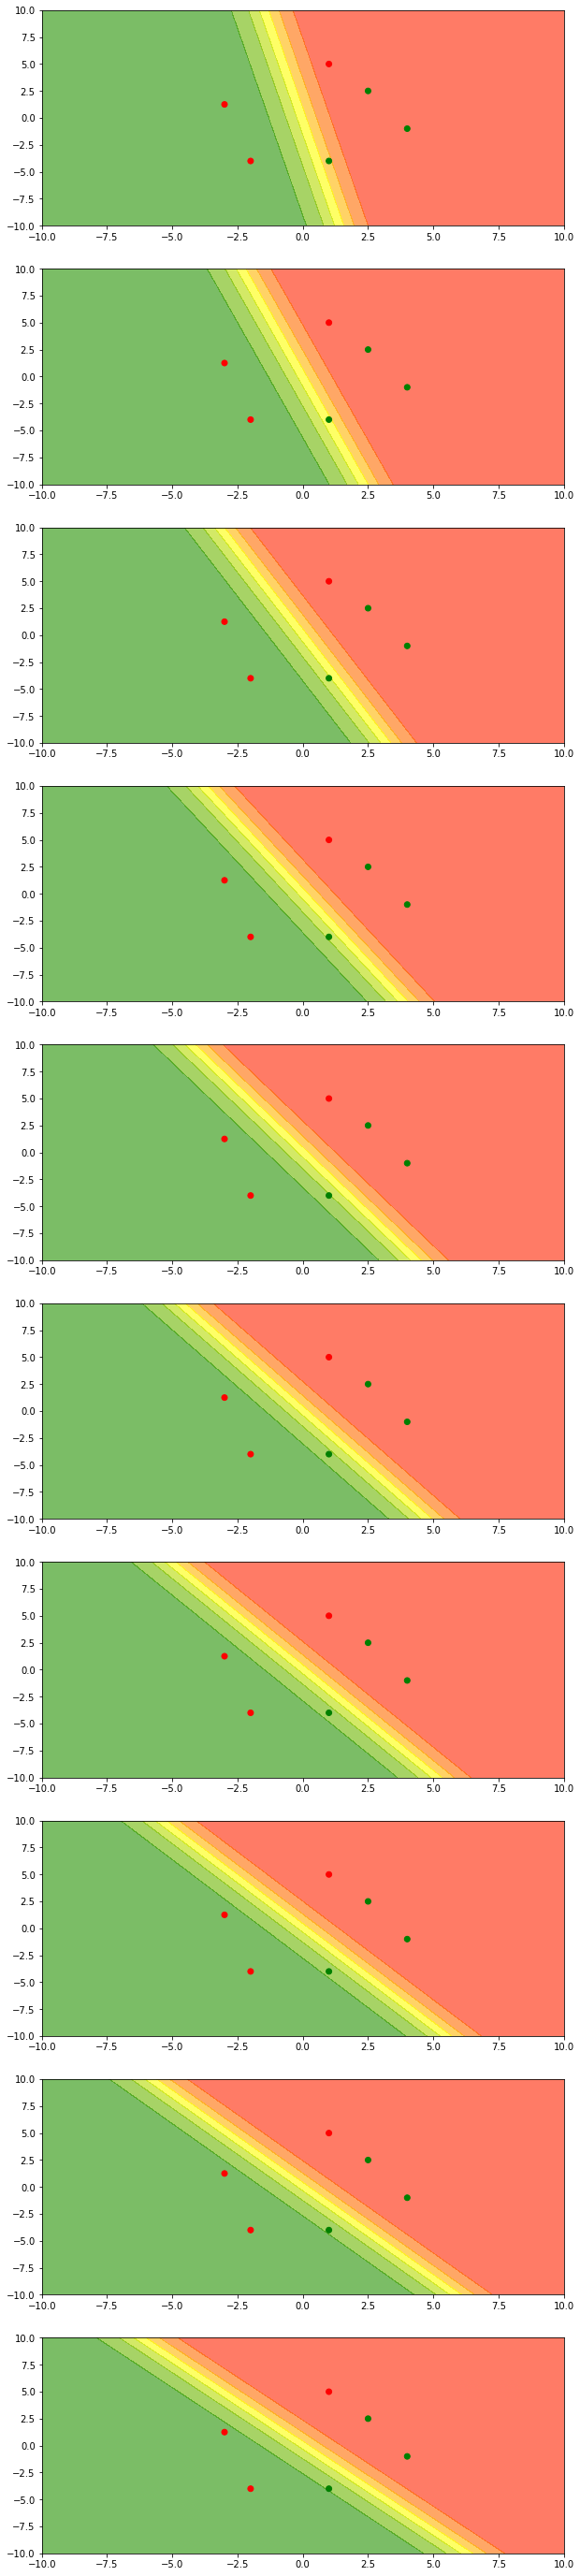

In [ ]:
#10 epochs
sn.fit(X,Y,epochs,learning_rate,True)
N = 10
plt.figure(figsize=(10,N*5))
for i in range(N):
  print(sn.w,",",sn.b)
  ax = plt.subplot(N,1,i+1)
  plot_sn(X,Y,sn,ax)
  sn.fit(X,Y,epochs,learning_rate,False)
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



[[ 1.10717268 -0.31075179]] , [-0.02136005]



[[ 1.13590362 -0.43034511]] , [-0.08368788]



[[ 1.21915934 -0.37115011]] , [-0.13444178]



[[ 1.25118554 -0.44065742]] , [-0.18370073]



[[ 1.30853373 -0.42258749]] , [-0.22549308]



[[ 1.34453983 -0.45315579]] , [-0.26493825]



[[ 1.38601886 -0.45781517]] , [-0.30017829]



[[ 1.4209971  -0.47219083]] , [-0.33290346]



[[ 1.4548785 -0.4820399]] , [-0.3629872]



[[ 1.48624651 -0.49230044]] , [-0.39091397]


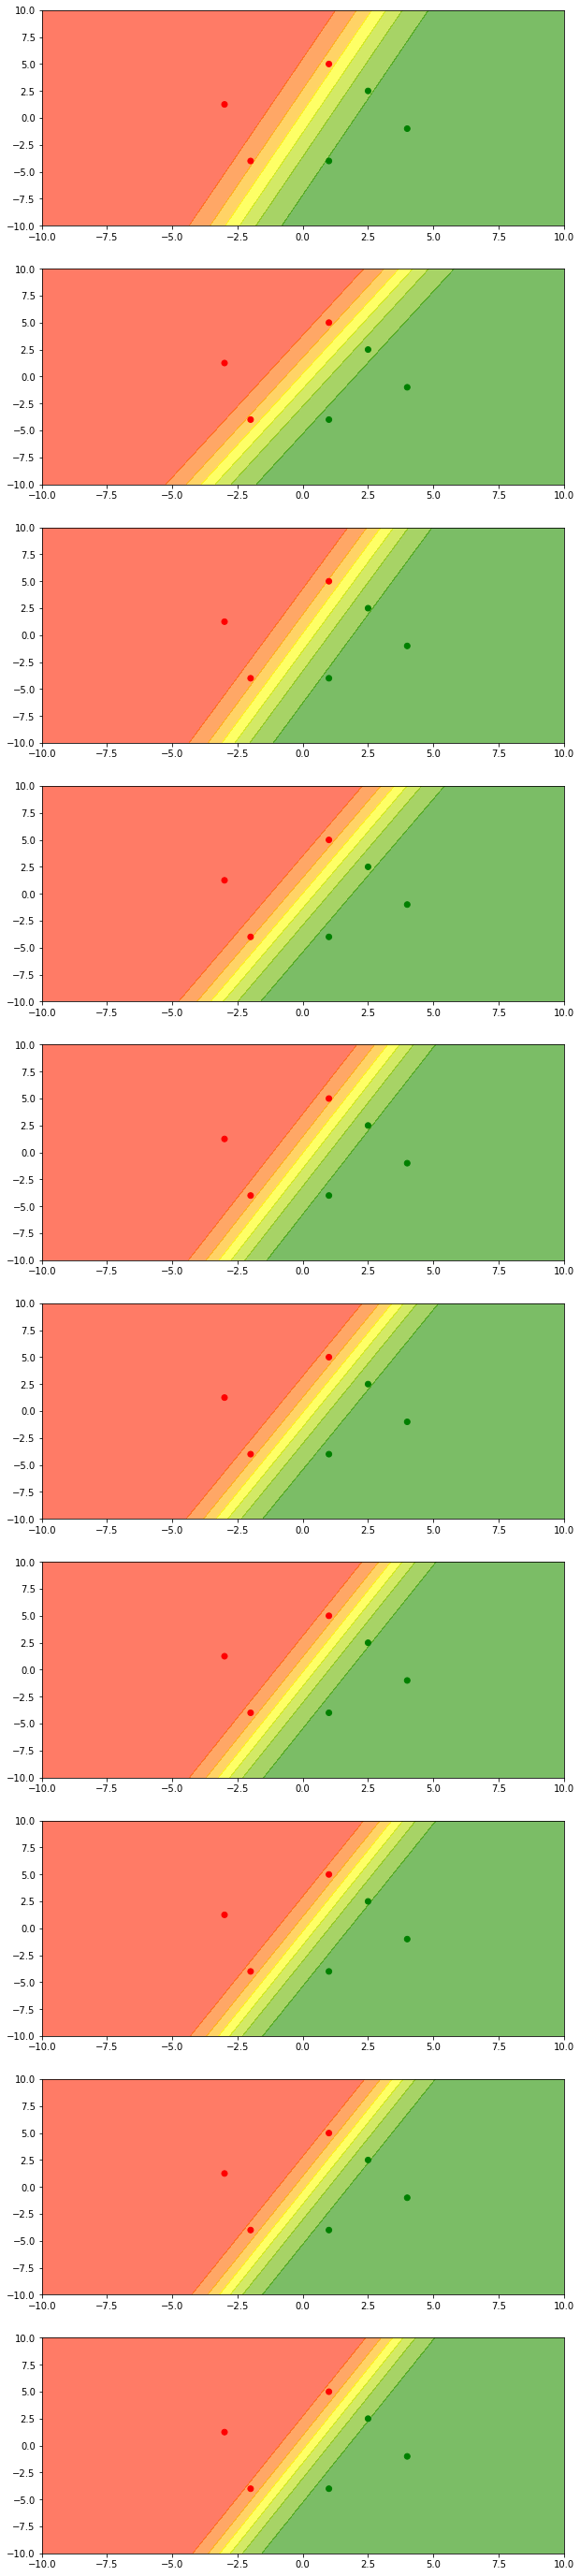

In [ ]:
learning_rate = 0.5
sn.fit(X,Y,epochs,learning_rate,True)
N = 10
plt.figure(figsize=(10,N*5))
for i in range(N):
  print(sn.w,",",sn.b)
  ax = plt.subplot(N,1,i+1)
  plot_sn(X,Y,sn,ax)
  sn.fit(X,Y,epochs,learning_rate,False)
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



[[ 0.70488564 -0.29776421]] , [-0.00769517]



[[ 0.86528203 -0.21498522]] , [-0.06408896]



[[ 0.91615919 -0.37942035]] , [-0.12338643]



[[ 1.04275167 -0.27424504]] , [-0.16997587]



[[ 1.07297674 -0.41294861]] , [-0.22045471]



[[ 1.16623792 -0.34248439]] , [-0.25938318]



[[ 1.19927716 -0.42156933]] , [-0.29986303]



[[ 1.26107269 -0.40095013]] , [-0.33306417]



[[ 1.29919843 -0.43353657]] , [-0.36550164]



[[ 1.34285908 -0.43908454]] , [-0.39438941]



[[ 1.37981951 -0.45400209]] , [-0.42157465]



[[ 1.41536062 -0.46467569]] , [-0.44672777]



[[ 1.44828543 -0.47550407]] , [-0.47025082]



[[ 1.4792476  -0.48549213]] , [-0.49227662]



[[ 1.50839678 -0.49492435]] , [-0.51297087]



[[ 1.53593412 -0.50383203]] , [-0.53246679]



[[ 1.56202087 -0.51227067]] , [-0.55088129]



[[ 1.58679657 -0.52028536]] , [-0.56831604]



[[ 1.61038195 -0.5279152 ]] , [-0.58485997]



[[ 1.63288212 -0.53519426]] , [-0.60059119]


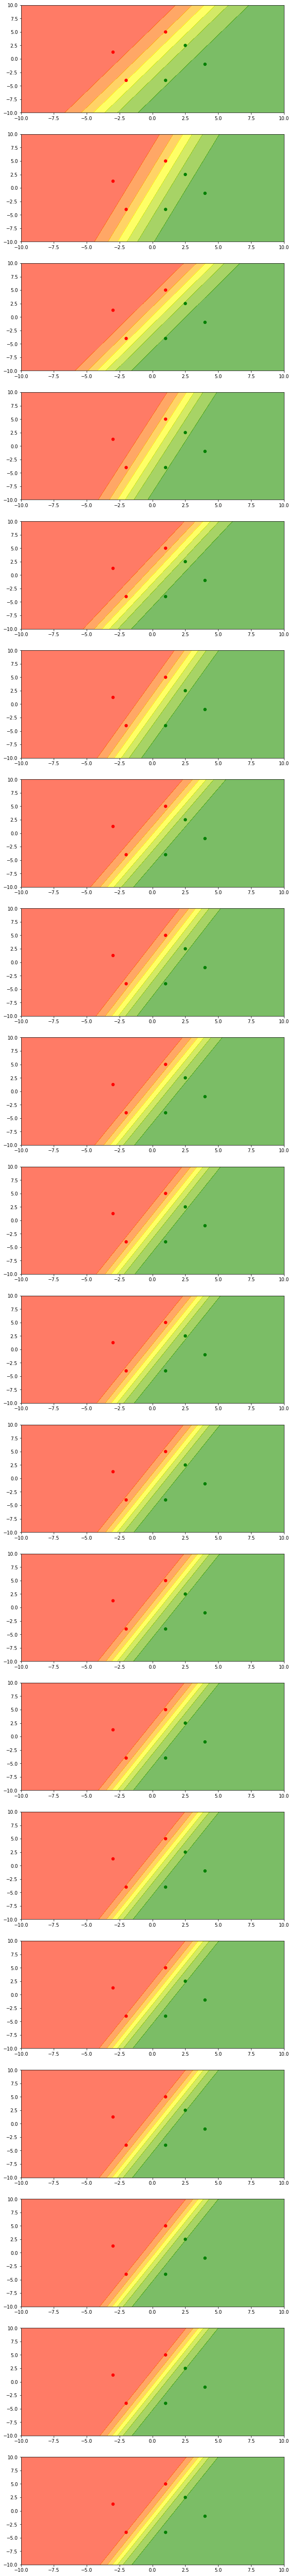

In [ ]:
learning_rate = 0.5
sn.fit(X,Y,epochs,learning_rate,True)
N = 20
plt.figure(figsize=(10,N*5))
for i in range(N):
  print(sn.w,",",sn.b)
  ax = plt.subplot(N,1,i+1)
  plot_sn(X,Y,sn,ax)
  sn.fit(X,Y,epochs,learning_rate,False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



[[ 0.1547917  -0.36880428]] , [0.03831213]



[[0.92266518 0.07500303]] , [0.0383556]



[[ 0.91850673 -0.60736937]] , [-0.00894276]



[[ 1.26394841 -0.07848319]] , [-0.07540454]



[[ 1.19091042 -0.68578152]] , [-0.16980951]



[[ 1.47892573 -0.2152988 ]] , [-0.24054006]



[[ 1.40164269 -0.7245899 ]] , [-0.33671277]



[[ 1.62352477 -0.35588725]] , [-0.39631203]



[[ 1.58216261 -0.65367283]] , [-0.4608605]



[[ 1.6829792  -0.50593745]] , [-0.49520845]



[[ 1.69390396 -0.57813166]] , [-0.52748483]



[[ 1.73016961 -0.56836804]] , [-0.552903]



[[ 1.75629035 -0.58112863]] , [-0.57724329]



[[ 1.78248217 -0.5887938 ]] , [-0.59972516]



[[ 1.8070414  -0.59668415]] , [-0.62077676]



[[ 1.83036811 -0.60411659]] , [-0.64052832]



[[ 1.85256026 -0.61119194]] , [-0.65912055]



[[ 1.87372267 -0.61794074]] , [-0.67667122]



[[ 1.89394573 -0.62439171]] , [-0.69328189]



[[ 1.91330851 -0.63056995]] , [-0.70904054]


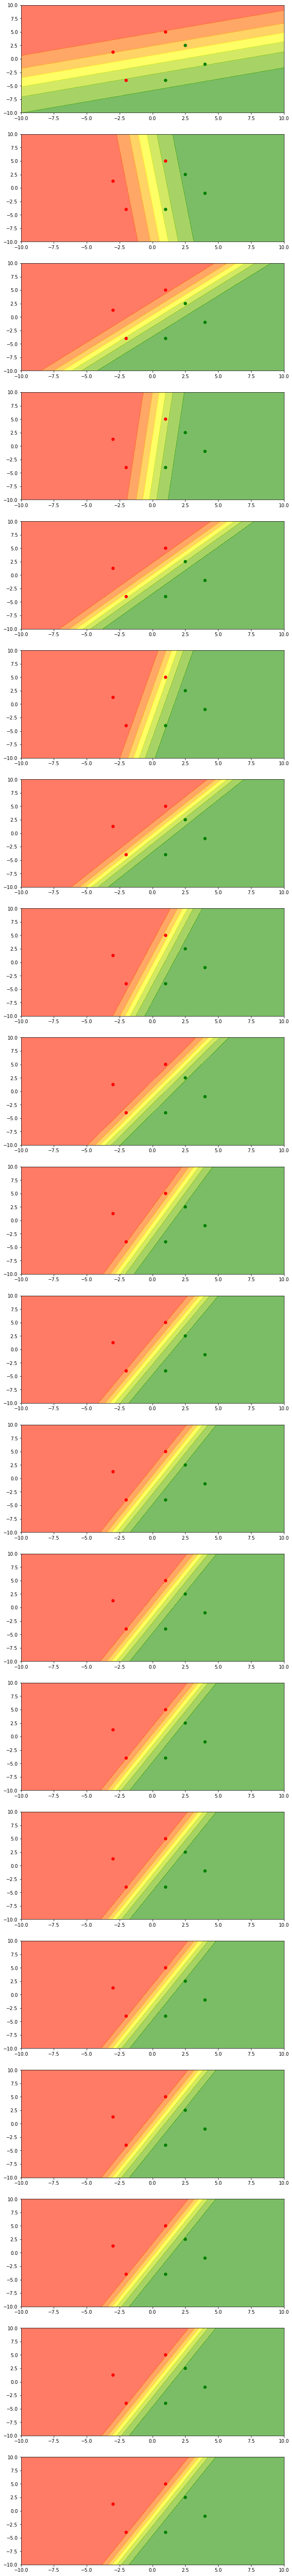

In [ ]:
learning_rate = 0.75
sn.fit(X,Y,epochs,learning_rate,True)
N = 20
plt.figure(figsize=(10,N*5))
for i in range(N):
  print(sn.w,",",sn.b)
  ax = plt.subplot(N,1,i+1)
  plot_sn(X,Y,sn,ax)
  sn.fit(X,Y,epochs,learning_rate,False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



[[1.04954858 0.09947014]] , [0.05411917]



[[ 1.04082368 -0.32407747]] , [0.02984694]



[[ 1.09358261 -0.39048679]] , [-0.03601821]



[[ 1.16754345 -0.37148478]] , [-0.09240669]



[[ 1.21177459 -0.41842454]] , [-0.14485764]



[[ 1.26824906 -0.41388601]] , [-0.19060726]



[[ 1.30910813 -0.44039949]] , [-0.23299787]



[[ 1.35275461 -0.44737887]] , [-0.27101611]



[[ 1.39012677 -0.46234916]] , [-0.30610069]



[[ 1.42609597 -0.47274001]] , [-0.33824676]



[[ 1.45924262 -0.48365777]] , [-0.36798853]



[[ 1.49042494 -0.49354929]] , [-0.39556549]



[[ 1.51972306 -0.50292809]] , [-0.42124623]



[[ 1.54736853 -0.51176502]] , [-0.44524118]



[[ 1.57352581 -0.52012879]] , [-0.46773342]



[[ 1.59834116 -0.52806427]] , [-0.48887941]



[[ 1.62194046 -0.53561177]] , [-0.50881409]



[[ 1.64443322 -0.54280626]] , [-0.52765442]



[[ 1.66591516 -0.54967829]] , [-0.54550224]



[[ 1.68647041 -0.55625476]] , [-0.56244666]



[[ 1.70617327 -0.56255938]] , [-0.578566]



[[ 1.72508963 -0.56861321]] , [-0.59392937]



[[ 1.74327817 -0.57443498]] , [-0.60859802]



[[ 1.7607914  -0.58004147]] , [-0.62262644]



[[ 1.77767643 -0.5854477 ]] , [-0.63606326]



[[ 1.79397568 -0.59066723]] , [-0.64895208]



[[ 1.80972751 -0.5957123 ]] , [-0.66133204]



[[ 1.82496668 -0.600594  ]] , [-0.67323846]



[[ 1.83972479 -0.6053224 ]] , [-0.68470326]



[[ 1.85403065 -0.60990671]] , [-0.69575539]


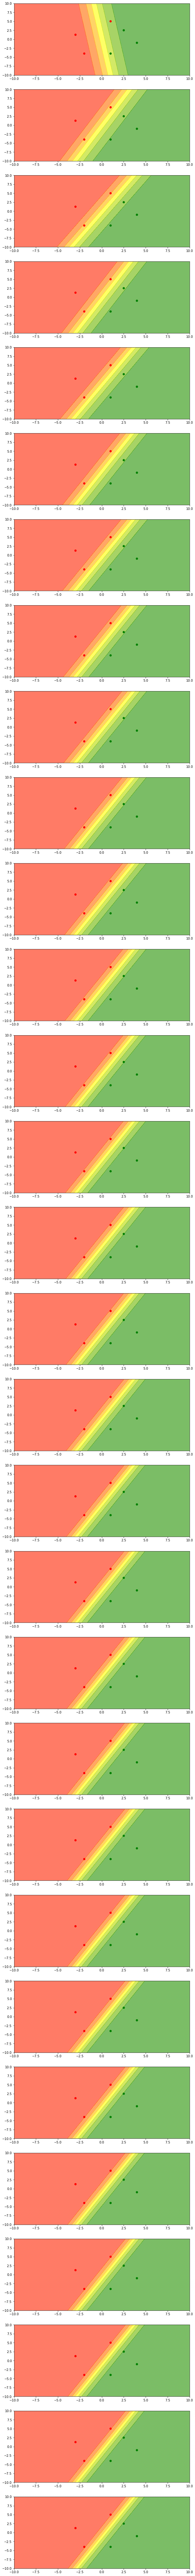

In [ ]:
learning_rate = 0.5
sn.fit(X,Y,epochs,learning_rate,True)
N = 30
plt.figure(figsize=(10,N*5))
for i in range(N):
  print(sn.w,",",sn.b)
  ax = plt.subplot(N,1,i+1)
  plot_sn(X,Y,sn,ax)
  sn.fit(X,Y,epochs,learning_rate,False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



[[-0.47812859  1.86494536]] , [6.93692431e-05]



[[-0.4017237   1.84078666]] , [0.00050089]



[[-0.30158611  1.808784  ]] , [0.0017457]



[[-0.1598795  1.763417 ]] , [0.00484715]



[[0.06451396 1.69201714]] , [0.01239154]



[[0.46218977 1.56588583]] , [0.02785654]



[[0.8916542 1.4152381]] , [0.00705239]



[[1.00409811 1.35575111]] , [-0.01388182]



[[1.0696031  1.30814593]] , [-0.02357329]



[[1.1167169  1.26191976]] , [-0.02716559]



[[1.15442162 1.21275093]] , [-0.02631149]



[[1.18700721 1.15720379]] , [-0.02144502]



[[1.21725526 1.09110821]] , [-0.01226529]



[[1.24768524 1.00802435]] , [0.00231504]



[[1.28153891 0.89643116]] , [0.02466018]



[[1.32421301 0.73365935]] , [0.05958431]



[[1.3841017  0.47845377]] , [0.1149693]



[[1.44828493 0.14158157]] , [0.17702263]



[[ 1.43821891 -0.1379597 ]] , [0.16423965]



[[ 1.38120576 -0.50165799]] , [0.09177389]



[[ 1.44226614 -0.46806719]] , [0.03254278]



[[ 1.47324428 -0.50932844]] , [-0.0220662]



[[ 1.51562088 -0.50597343]] , [-0.07060604]



[[ 1.54757785 -0.52356833]] , [-0.1151798]



[[ 1.58021178 -0.53103404]] , [-0.15577411]



[[ 1.60949375 -0.54117792]] , [-0.19316031]



[[ 1.63718959 -0.54972641]] , [-0.22766158]



[[ 1.66310464 -0.55796988]] , [-0.25965365]



[[ 1.68752302 -0.56569503]] , [-0.28942471]



[[ 1.71059059 -0.57299823]] , [-0.31722566]


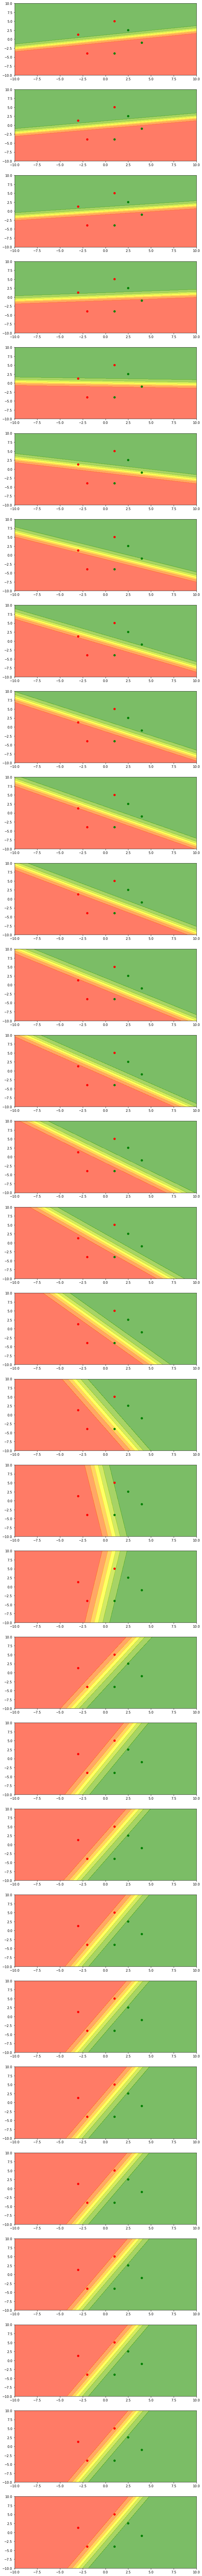

In [ ]:
learning_rate = 0.5
sn.fit(X,Y,epochs,learning_rate,True)
N = 30
plt.figure(figsize=(10,N*5))
for i in range(N):
  print(sn.w,",",sn.b)
  ax = plt.subplot(N+1,1,i+2)
  plot_sn(X,Y,sn,ax)
  sn.fit(X,Y,epochs,learning_rate,False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



[[-0.00476816  2.05613759]] , [0.00126945]



[[0.26250062 1.97363665]] , [0.01516559]



[[0.72072669 1.83039062]] , [0.03299221]



[[1.01778419 1.71986226]] , [-0.00953718]



[[1.12097763 1.67401616]] , [-0.03392426]



[[1.18297317 1.64255942]] , [-0.04844814]



[[1.22731184 1.6168051 ]] , [-0.05810077]



[[1.26187849 1.59377684]] , [-0.06478956]



[[1.29027978 1.57207033]] , [-0.06942656]



[[1.31447348 1.5508762 ]] , [-0.07250843]



[[1.33564864 1.52964834]] , [-0.07432553]



[[1.35459016 1.50796278]] , [-0.07505143]



[[1.37185329 1.48544517]] , [-0.07478544]



[[1.38785687 1.46172543]] , [-0.07357376]



[[1.40293865 1.43640176]] , [-0.07141908]



[[1.41739194 1.40900397]] , [-0.06828293]



[[1.43149414 1.378948  ]] , [-0.06408179]



[[1.44553369 1.34547083]] , [-0.05867612]



[[1.45984211 1.30752862]] , [-0.05184913]



[[1.47484016 1.26362545]] , [-0.04326812]



[[1.49111465 1.21150639]] , [-0.03241306]



[[1.50956085 1.14756863]] , [-0.01843841]



[[1.53167078 1.06564802]] , [0.00011092]



[[1.56015518 0.95435441]] , [0.02591553]



[[1.60023029 0.79132552]] , [0.06415578]



[[1.66019457 0.53827904]] , [0.12305644]



[[1.72652297 0.22483961]] , [0.18889276]



[[1.73206204 0.01758056]] , [0.1938966]



[[ 1.69547081 -0.24081757]] , [0.15543848]



[[ 1.63151354 -0.60054865]] , [0.07919253]


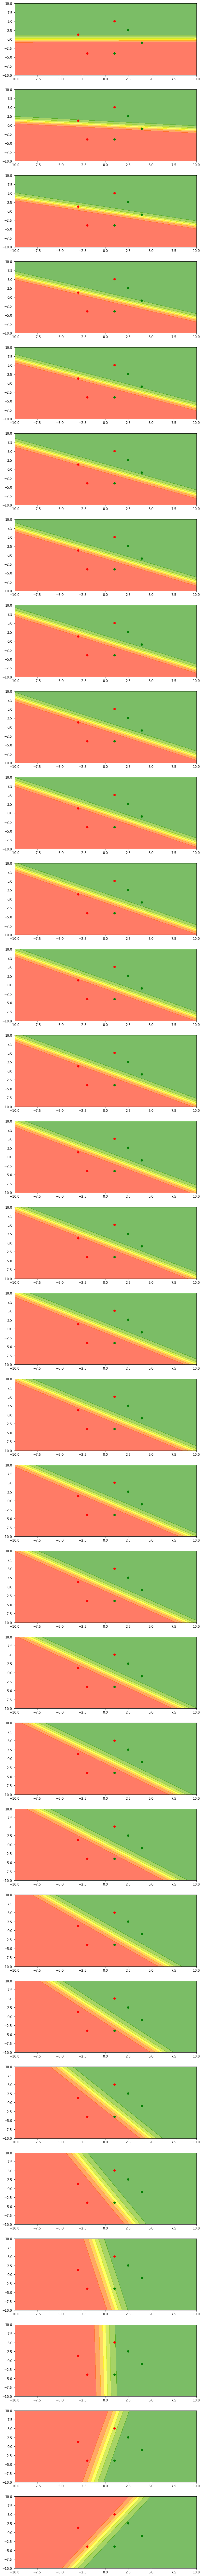

In [ ]:
learning_rate = 0.5
sn.fit(X,Y,epochs,0.05,True)
N = 30
plt.figure(figsize=(10,N*5))
for i in range(N):
  print(sn.w,",",sn.b)
  ax = plt.subplot(N+1,1,i+2)
  plot_sn(X,Y,sn,ax)
  sn.fit(X,Y,epochs,learning_rate,False)